In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

def load_data(filepath):
    data = pd.read_csv(filepath)
    X = data.drop(columns=['Rings'])  
    y = data['Rings']
    return X, y

def decision_tree_find_best_params_avg(X, y, selected_features=None, n_splits=10):
    # Define the parameter grid for pre-pruning (without criterion)
    param_grid = {
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5]
    }
    
    best_params = None
    best_avg_accuracy = 0
    best_avg_f1 = 0
    best_model = None

    # Iterate over each combination of parameters
    for max_depth in param_grid['max_depth']:
        for min_samples_split in param_grid['min_samples_split']:
            for min_samples_leaf in param_grid['min_samples_leaf']:
                # Set the current parameters
                params = {
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf
                }

                accuracies = []
                f1_scores = []
                
                # Perform n_splits train/test splits
                for _ in range(n_splits):
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=_)
                    
                    # Initialize and train the Decision Tree with current parameters
                    dt_clf = DecisionTreeClassifier(**params)
                    dt_clf.fit(X_train, y_train.values.ravel())
                    
                    # Predict and evaluate the model
                    y_pred = dt_clf.predict(X_test)
                    accuracies.append(accuracy_score(y_test, y_pred))
                    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
                
                # Calculate average accuracy and F1 score for the current parameters
                avg_accuracy = np.mean(accuracies)
                avg_f1 = np.mean(f1_scores)
                
                print(f"Parameters: {params} - Average Accuracy: {avg_accuracy:.4f}, Average F1 Score: {avg_f1:.4f}")
                
                # Update best model if current one is better
                if avg_f1 > best_avg_f1 or (avg_f1 == best_avg_f1 and avg_accuracy > best_avg_accuracy):
                    best_avg_f1 = avg_f1
                    best_avg_accuracy = avg_accuracy
                    best_params = params
                    best_model = dt_clf
    
    print(f"\nBest Parameters: {best_params} - Best Average Accuracy: {best_avg_accuracy:.4f}, Best Average F1 Score: {best_avg_f1:.4f}")
    return best_model, best_params

# Run the function
if __name__ == '__main__':
    X, y = load_data('C:/Users/Admin/Desktop/NN_assignment3/data/abalone.csv')
    decision_tree_find_best_params_avg(X, y, selected_features=None, n_splits=5)


Parameters: {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1} - Average Accuracy: 0.5309, Average F1 Score: 0.5308
Parameters: {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 2} - Average Accuracy: 0.5414, Average F1 Score: 0.5361
Parameters: {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 5} - Average Accuracy: 0.5696, Average F1 Score: 0.5657
Parameters: {'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 1} - Average Accuracy: 0.5309, Average F1 Score: 0.5278
Parameters: {'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 2} - Average Accuracy: 0.5455, Average F1 Score: 0.5406
Parameters: {'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 5} - Average Accuracy: 0.5689, Average F1 Score: 0.5655
Parameters: {'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 1} - Average Accuracy: 0.5490, Average F1 Score: 0.5466
Parameters: {'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf'

ccp_alpha: 0.0000 - Average Accuracy: 0.5325, Average F1 Score: 0.5327
ccp_alpha: 0.0003 - Average Accuracy: 0.5380, Average F1 Score: 0.5381
ccp_alpha: 0.0004 - Average Accuracy: 0.5488, Average F1 Score: 0.5470
ccp_alpha: 0.0005 - Average Accuracy: 0.5581, Average F1 Score: 0.5556
ccp_alpha: 0.0006 - Average Accuracy: 0.5849, Average F1 Score: 0.5819
ccp_alpha: 0.0009 - Average Accuracy: 0.6022, Average F1 Score: 0.5922
ccp_alpha: 0.0009 - Average Accuracy: 0.6012, Average F1 Score: 0.5915
ccp_alpha: 0.0011 - Average Accuracy: 0.6060, Average F1 Score: 0.5966
ccp_alpha: 0.0012 - Average Accuracy: 0.6098, Average F1 Score: 0.6006
ccp_alpha: 0.0013 - Average Accuracy: 0.6089, Average F1 Score: 0.5963
ccp_alpha: 0.0013 - Average Accuracy: 0.6108, Average F1 Score: 0.5971
ccp_alpha: 0.0016 - Average Accuracy: 0.6050, Average F1 Score: 0.5870
ccp_alpha: 0.0017 - Average Accuracy: 0.6065, Average F1 Score: 0.5881
ccp_alpha: 0.0022 - Average Accuracy: 0.6055, Average F1 Score: 0.5900
ccp_al

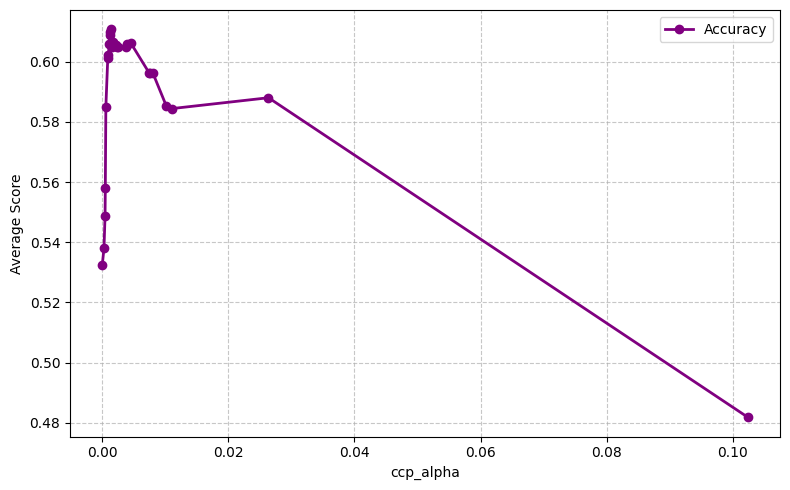

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

def load_data(filepath):
    """
    Load the data and split it into features (X) and target (y).
    """
    data = pd.read_csv(filepath)
    X = data.drop(columns=['Rings'])  
    y = data['Rings']
    return X, y

def decision_tree_post_pruning(X, y, selected_features=None, n_splits=5):
    """Find the best post-pruning parameter (ccp_alpha) for Decision Tree using average performance and plot the results."""
    
    # Initialize variables to track the best model and its parameters
    best_ccp_alpha = None
    best_avg_accuracy = 0
    best_avg_f1 = 0
    best_model = None
    ccp_alphas_list = []
    avg_accuracies = []
    avg_f1_scores = []
    
    # Split the data once to determine the range of ccp_alpha values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
    dt = DecisionTreeClassifier(max_depth=5, min_samples_split=2,min_samples_leaf= 5,random_state=0)
    path = dt.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas = path.ccp_alphas  # Get range of ccp_alpha values for pruning

    # Iterate over each value of ccp_alpha
    for ccp_alpha in ccp_alphas:
        accuracies = []
        f1_scores = []
        
        # Perform n_splits train-test splits and evaluate the model
        for _ in range(n_splits):
            # Split the data randomly
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=_)
            
            # Initialize the decision tree with the current ccp_alpha value
            dt_pruned = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
            dt_pruned.fit(X_train, y_train.values.ravel())
            
            # Predict and evaluate
            y_pred = dt_pruned.predict(X_test)
            accuracies.append(accuracy_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        
        # Calculate average accuracy and F1 score for the current ccp_alpha
        avg_accuracy = np.mean(accuracies)
        avg_f1 = np.mean(f1_scores)
        
        print(f"ccp_alpha: {ccp_alpha:.4f} - Average Accuracy: {avg_accuracy:.4f}, Average F1 Score: {avg_f1:.4f}")
        
        # Store the results for plotting
        ccp_alphas_list.append(ccp_alpha)
        avg_accuracies.append(avg_accuracy)
        avg_f1_scores.append(avg_f1)
        
        # Check if this is the best model so far
        if avg_f1 > best_avg_f1 or (avg_f1 == best_avg_f1 and avg_accuracy > best_avg_accuracy):
            best_avg_f1 = avg_f1
            best_avg_accuracy = avg_accuracy
            best_ccp_alpha = ccp_alpha
            best_model = dt_pruned
    
    print(f"\nBest ccp_alpha: {best_ccp_alpha} - Best Average Accuracy: {best_avg_accuracy:.4f}, Best Average F1 Score: {best_avg_f1:.4f}")

    # Plot the results
    plt.figure(figsize=(8, 5))
    plt.plot(ccp_alphas_list, avg_accuracies, marker='o', color='purple', label='Accuracy', linewidth=2)
    plt.xlabel("ccp_alpha")
    plt.ylabel("Average Score")
    plt.legend()
    plt.grid(True,linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.savefig("post_pruning_performance.png", dpi=300)
    plt.show()

    return best_model, best_ccp_alpha

if __name__ == '__main__':
    X, y = load_data('C:/Users/Admin/Desktop/NN_assignment3/data/abalone.csv')
    decision_tree_post_pruning(X, y, selected_features=None, n_splits=5)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1095481505188679


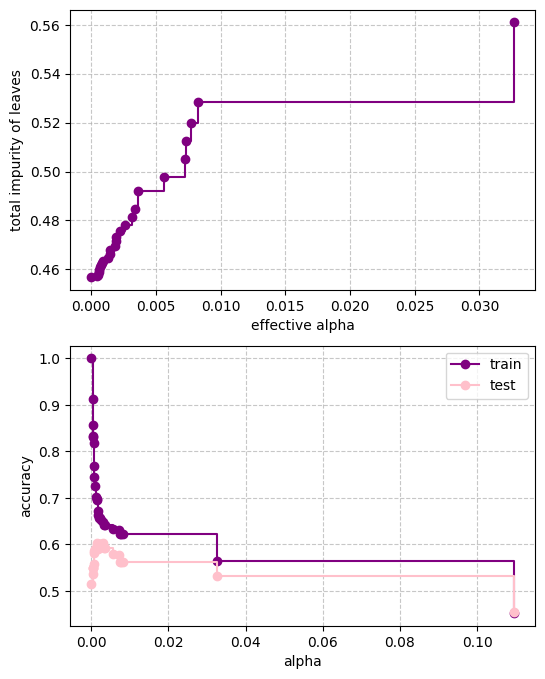

In [ ]:
#Source: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

def load_data(filepath):
    """
    Load the data and split it into features (X) and target (y).
    """
    data = pd.read_csv(filepath)
    X = data.drop(columns=['Rings'])  
    y = data['Rings']
    return X, y

X, y = load_data('C:/Users/Admin/Desktop/NN_assignment3/data/abalone.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

clf = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=5, random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots(2, 1, figsize=(6, 8))
ax[0].plot(ccp_alphas[:-1], impurities[:-1],color='purple', marker='o', drawstyle="steps-post")
ax[0].set_xlabel("effective alpha")
ax[0].grid(True, linestyle="--", alpha=0.7)
ax[0].set_ylabel("total impurity of leaves")
# ax.set_title("Total Impurity vs effective alpha for training set")

#Next, we train a decision tree using the effective alphas. 
#The last value in ccp_alphas is the alpha value that prunes the whole tree,
# leaving the tree, clfs[-1], with one node.

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))



train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

ax[1].set_xlabel("alpha")
ax[1].set_ylabel("accuracy")
# ax.set_title("Total Impurity & Accuracy vs alpha for training and testing sets")
ax[1].grid(True, linestyle="--", alpha=0.7)
ax[1].plot(ccp_alphas, train_scores, marker='o', label="train",color='purple',
        drawstyle="steps-post")
ax[1].plot(ccp_alphas, test_scores, marker='o', label="test",color='pink',
        drawstyle="steps-post")
ax[1].legend()
plt.savefig('xxx.png')
plt.show()



Best ccp_alpha: 0.0012195591745296254 - Best Average Accuracy: 0.6079, Best Average F1 Score: 0.5880
Best Node Count: 37, Best Depth: 5


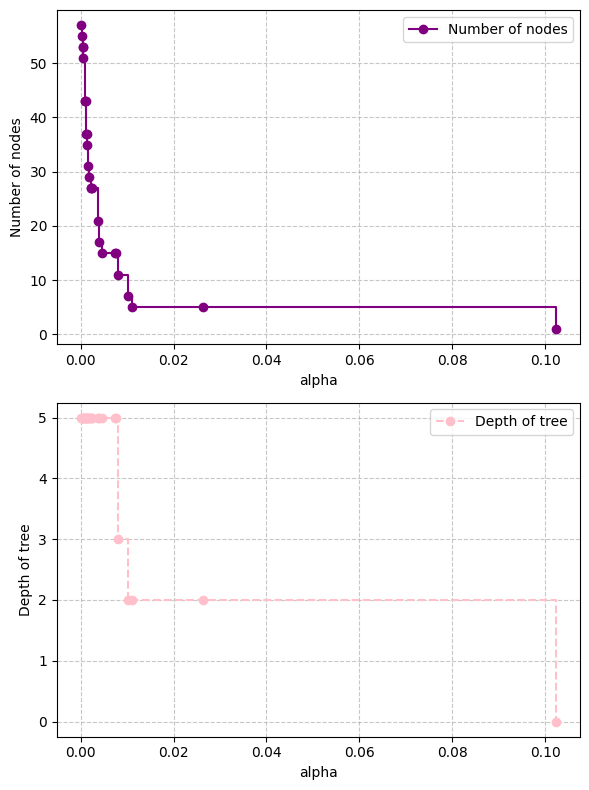

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

def load_data(filepath):
    """
    Load the data and split it into features (X) and target (y).
    """
    data = pd.read_csv(filepath)
    X = data.drop(columns=['Rings'])  
    y = data['Rings']
    return X, y

def decision_tree_post_pruning(X, y, selected_features=None, n_splits=5):
    """Find the best post-pruning parameter (ccp_alpha) for Decision Tree and plot the results."""
    
    # Initialize variables to track the best model and its parameters
    best_ccp_alpha = None
    best_avg_accuracy = 0
    best_avg_f1 = 0
    best_model = None
    best_node_count = None
    best_depth = None
    ccp_alphas_list = []
    node_counts = []
    depths = []
    avg_accuracies = []
    avg_f1_scores = []
    
    # Split the data once to determine the range of ccp_alpha values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
    dt = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=5, random_state=0)
    path = dt.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas = path.ccp_alphas  # Get range of ccp_alpha values for pruning

    # Iterate over each value of ccp_alpha
    for ccp_alpha in ccp_alphas:
        accuracies = []
        f1_scores = []
        
        # Perform n_splits train-test splits and evaluate the model
        for _ in range(n_splits):
            # Split the data randomly
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=_)
            
            # Initialize the decision tree with the current ccp_alpha value and pre-pruning parameters
            dt_pruned = DecisionTreeClassifier(
                random_state=0, 
                ccp_alpha=ccp_alpha, 
                max_depth=5, 
                min_samples_split=2, 
                min_samples_leaf=5
            )
            dt_pruned.fit(X_train, y_train.values.ravel())
            
            # Predict and evaluate
            y_pred = dt_pruned.predict(X_test)
            accuracies.append(accuracy_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        
        # Calculate average accuracy and F1 score for the current ccp_alpha
        avg_accuracy = np.mean(accuracies)
        avg_f1 = np.mean(f1_scores)
        
        # Store the results for plotting
        ccp_alphas_list.append(ccp_alpha)
        avg_accuracies.append(avg_accuracy)
        avg_f1_scores.append(avg_f1)
        node_counts.append(dt_pruned.tree_.node_count)
        depths.append(dt_pruned.tree_.max_depth)
        
        # Check if this is the best model so far
        if avg_f1 > best_avg_f1 or (avg_f1 == best_avg_f1 and avg_accuracy > best_avg_accuracy):
            best_avg_f1 = avg_f1
            best_avg_accuracy = avg_accuracy
            best_ccp_alpha = ccp_alpha
            best_model = dt_pruned
            best_node_count = dt_pruned.tree_.node_count
            best_depth = dt_pruned.tree_.max_depth
    
    print(f"\nBest ccp_alpha: {best_ccp_alpha} - Best Average Accuracy: {best_avg_accuracy:.4f}, Best Average F1 Score: {best_avg_f1:.4f}")
    print(f"Best Node Count: {best_node_count}, Best Depth: {best_depth}")

    # Plot the node count and depth vs. alpha with optimized colors and structure
    fig, ax = plt.subplots(2, 1, figsize=(6, 8))

    # Plot Number of nodes vs alpha
    ax[0].plot(ccp_alphas_list, node_counts, marker="o", color="purple", drawstyle="steps-post", label="Number of nodes")
    ax[0].set_xlabel("alpha")
    ax[0].set_ylabel("Number of nodes")
    ax[0].grid(True, linestyle="--", alpha=0.7)
    ax[0].legend(loc="upper right")

    # Plot Depth vs alpha
    ax[1].plot(ccp_alphas_list, depths, marker="o", color="pink", linestyle="--", drawstyle="steps-post", label="Depth of tree")
    ax[1].set_xlabel("alpha")
    ax[1].set_ylabel("Depth of tree")
    ax[1].grid(True, linestyle="--", alpha=0.7)
    ax[1].legend(loc="upper right")
    
    fig.tight_layout()
    plt.savefig("optimized_pruning_metrics.png", dpi=300)
    plt.show()

    return best_model, best_ccp_alpha, best_node_count, best_depth

if __name__ == '__main__':
    X, y = load_data('C:/Users/Admin/Desktop/NN_assignment3/data/abalone.csv')
    decision_tree_post_pruning(X, y, selected_features=None, n_splits=5)
